Dataset source below: https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information/metadata

Questions:
1) Predict the energy usage in a household depending on the weather conditions
2) Predict what part of the house turns on based on the weather (we could determine this based on energy outputs of the different appliances, rather than the house as a whole; so the machine learning model would automatically turn on the heating if the temperature drops etc)

This dataset CSV file contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

Importing libraries

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline


Setting Jupyter to see all columns and rows (instead of default truncated results for large datasets)

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
df=pd.read_csv("HomeC.csv")

# PART-1 Data Preparation

## 1) Dataset description

About the dataset:
The original dataset contains 503 911 rows and 32 columns.

Columns description:
https://www.kaggle.com/code/olivadebnath/machine-learning-for-iot

* Index
time - Time of the readings, with a time span of 1 minute. In this dataset, time is recorded in the Unix Time format (Unix Time represents the number of seconds that have passed since 00:00:00 UTC Thursday, 1 January 1970)

* Energy Usage
use [kW] - Total energy consumption
gen [kW] - Total energy generated by means of solar or other power generation resources
House overall [kW] - overall house energy consumption
Dishwasher [kW] - energy consumed by specific appliance
Furnace 1 [kW] - energy consumed by specific appliance
Furnace 2 [kW] - energy consumed by specific appliance
Home office [kW] - energy consumed by specific appliance
Fridge [kW] - energy consumed by specific appliance
Wine cellar [kW] - energy consumed by specific appliance
Garage door [kW] - energy consumed by specific appliance
Kitchen 12 [kW] - energy consumption in kitchen 1
Kitchen 14 [kW]- energy consumption in kitchen 2
Kitchen 38 [kW]- energy consumption in kitchen 3
Barn [kW]- energy consumed by specific appliance
Well [kW]- energy consumed by specific appliance
Microwave [kW]- energy consumed by specific appliance
Living room [kW]- energy consumption in Living room
Solar [kW]- Solar power generation

*Weather
- temperature: Temperature is a physical quantity expressing hot and cold.
- humidity: Humidity is the concentration of water vapour present in air.
- visibility: Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.
- apparentTemperature: Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.
- pressure: Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
- windSpeed: Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.
- cloudCover: Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.
- windBearing: In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
- dewPoint: the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.
- precipProbability: A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location.
- precipIntensity: The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.

*Other
- summary:
Report generated by the by the data collection system.
Including:
Clear, Mostly Cloudy, Overcast, Partly Cloudy, Drizzle,
 Light Rain, Rain, Light Snow, Flurries, Breezy, Snow,
 Rain and Breezy, Foggy, Breezy and Mostly Cloudy,
 Breezy and Partly Cloudy, Flurries and Breezy, Dry,
 Heavy, Snow.
 
- icon:
The icon that is used by the data collection system.
Including: cloudy, clear-night, partly-cloudy-night, clear-day, partly-cloudy-day, rain, snow, wind, fog.

In [ ]:
df.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,0.012433,0.000483,0.000567,0.000000,0.031450,0.001017,0.004067,0.001583,0.003433,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,0.012417,0.000517,0.000550,0.000000,0.031550,0.001033,0.004117,0.001533,0.003450,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,0.012550,0.000483,0.000450,0.000000,0.031733,0.001033,0.004200,0.001550,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,0.012717,0.000467,0.000300,0.000017,0.031767,0.001017,0.004200,0.001567,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,0.013350,0.000367,0.000050,0.000000,0.031667,0.001017,0.004200,0.001617,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
df.shape

(503911, 32)

In [ ]:
df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [ ]:
df.nunique()

time                   503911
use [kW]               130103
gen [kW]                29904
House overall [kW]     130103
Dishwasher [kW]          9595
Furnace 1 [kW]          28755
Furnace 2 [kW]          28700
Home office [kW]        23272
Fridge [kW]             13986
Wine cellar [kW]        10738
Garage door [kW]         4567
Kitchen 12 [kW]          2308
Kitchen 14 [kW]          7466
Kitchen 38 [kW]             9
Barn [kW]               19906
Well [kW]                6329
Microwave [kW]           4386
Living room [kW]         7342
Solar [kW]              29904
temperature              5063
icon                        9
humidity                   86
visibility                705
summary                    18
apparentTemperature      5295
pressure                 3017
windSpeed                1671
cloudCover                118
windBearing               360
precipIntensity           433
dewPoint                 4931
precipProbability          85
dtype: int64

In [ ]:
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


## 2) Column names

Removing [kW] from column description

In [ ]:
df.columns = [col.replace(' [kW]', '') for col in df.columns]

In [ ]:
df.describe()

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


## 3) Data cleaning

Checking for duplicates - there are no duplicated rows

In [ ]:
df.duplicated().sum()

0

Checking for NaN values - there is 1 NaN value in all columns, except time

In [ ]:
df.isnull().sum()

time                   0
use                    1
gen                    1
House overall          1
Dishwasher             1
Furnace 1              1
Furnace 2              1
Home office            1
Fridge                 1
Wine cellar            1
Garage door            1
Kitchen 12             1
Kitchen 14             1
Kitchen 38             1
Barn                   1
Well                   1
Microwave              1
Living room            1
Solar                  1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

We can see that all NaN values are in the row 503910. This row has no values other than NaN, so can be removed

In [ ]:
table_NaN = df[df.isnull().sum(axis=1) >= 1] 
table_NaN

,time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1=df.drop([503910],axis=0)

In [ ]:
df1.shape

(503910, 32)

All NaN values have been cleaned

In [ ]:
df1.isnull().sum()

time                   0
use                    0
gen                    0
House overall          0
Dishwasher             0
Furnace 1              0
Furnace 2              0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Kitchen 12             0
Kitchen 14             0
Kitchen 38             0
Barn                   0
Well                   0
Microwave              0
Living room            0
Solar                  0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

Investigating the columns with non-numerical data.
There are 4 columns in object-format:
- Time
- icon
- summary
- cloudCover

Columns icon and summary contain categorical-value data collection - the columns will be removed.

In [ ]:
df1.dtypes

time                    object
use                    float64
gen                    float64
House overall          float64
Dishwasher             float64
Furnace 1              float64
Furnace 2              float64
Home office            float64
Fridge                 float64
Wine cellar            float64
Garage door            float64
Kitchen 12             float64
Kitchen 14             float64
Kitchen 38             float64
Barn                   float64
Well                   float64
Microwave              float64
Living room            float64
Solar                  float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [ ]:
df1.drop(columns=["icon","summary"], inplace=True)

In [ ]:
df1.dtypes

time                    object
use                    float64
gen                    float64
House overall          float64
Dishwasher             float64
Furnace 1              float64
Furnace 2              float64
Home office            float64
Fridge                 float64
Wine cellar            float64
Garage door            float64
Kitchen 12             float64
Kitchen 14             float64
Kitchen 38             float64
Barn                   float64
Well                   float64
Microwave              float64
Living room            float64
Solar                  float64
temperature            float64
humidity               float64
visibility             float64
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: object

Investigating column "cloudCover" - this column contains text "cloudCover" in place of NaN values. There are 58 rows with this invalid value in the column "cloudCover" - this is very small number of rows (58 values in 503910 Total row) - I will use median to fill these NaNs.
Once all values are numerical, I will change the data type to float64.

In [ ]:
df1["cloudCover"].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [ ]:
df1.shape

(503910, 30)

In [ ]:
df1[df1["cloudCover"]=="cloudCover"].shape

(58, 30)

In [ ]:
df1["cloudCover"].replace(["cloudCover"], np.NaN, inplace=True)
df1.isnull().sum()

time                    0
use                     0
gen                     0
House overall           0
Dishwasher              0
Furnace 1               0
Furnace 2               0
Home office             0
Fridge                  0
Wine cellar             0
Garage door             0
Kitchen 12              0
Kitchen 14              0
Kitchen 38              0
Barn                    0
Well                    0
Microwave               0
Living room             0
Solar                   0
temperature             0
humidity                0
visibility              0
apparentTemperature     0
pressure                0
windSpeed               0
cloudCover             58
windBearing             0
precipIntensity         0
dewPoint                0
precipProbability       0
dtype: int64

In [ ]:
df1["cloudCover"]=df1["cloudCover"].fillna(df1["cloudCover"].median())

In [ ]:
df1.isnull().sum()

time                   0
use                    0
gen                    0
House overall          0
Dishwasher             0
Furnace 1              0
Furnace 2              0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Kitchen 12             0
Kitchen 14             0
Kitchen 38             0
Barn                   0
Well                   0
Microwave              0
Living room            0
Solar                  0
temperature            0
humidity               0
visibility             0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [ ]:
df1["cloudCover"] = df1["cloudCover"].astype("float")

Time column shows time of measurements in Unix Time format - I will convert Unix Time to format "%Y-%m-%d %H:%M:%S". assigning 1minute intervals between measurements

In [ ]:
import time 
print("start", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(int(df1['time'].iloc[0]))))

start 2016-01-01 05:00:00


# Feature engineering

In [ ]:
#creating new column "time" that will allow us to extract information related to time. 
time_index = pd.date_range('2016-01-01 05:00', periods=len(df1),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df1 = df1.set_index(time_index)

In [ ]:
df1['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df1),  freq='min'))
df1.head()

,time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-01 05:00:00,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0


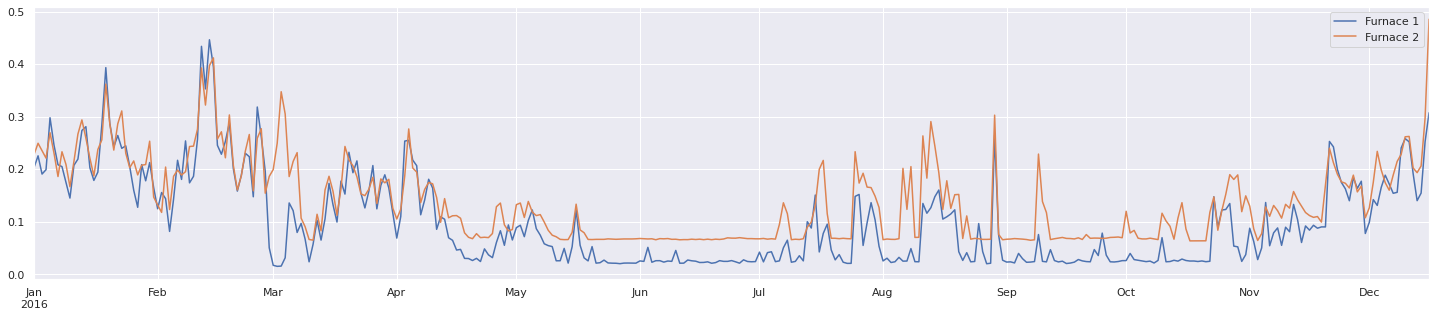

In [ ]:
df1.resample(rule='D').mean().plot(y=["Furnace 1", "Furnace 2"],figsize=(25,5))

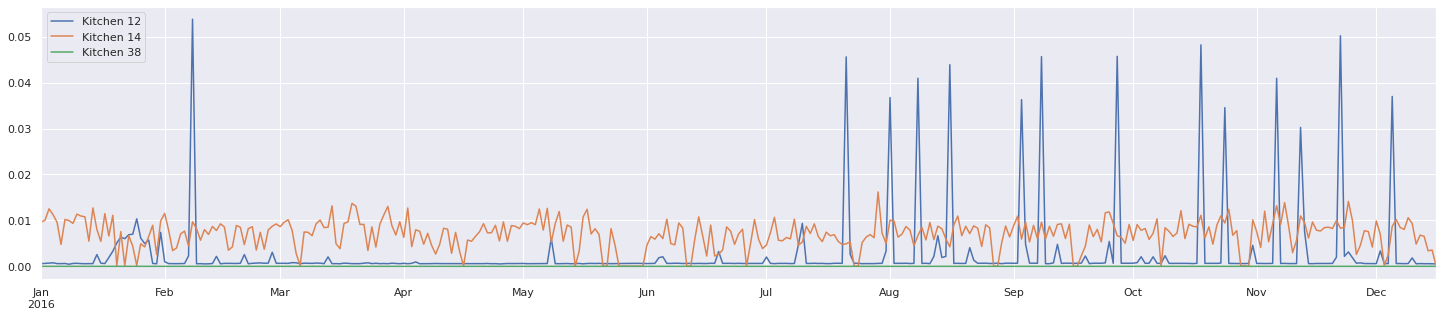

In [ ]:
df1.resample(rule='D').mean().plot(y=['Kitchen 12','Kitchen 14','Kitchen 38'],figsize=(25,5))

In [ ]:
# creating aggregated columns with sum of information of furnaces and kitchens
df1['Furnace'] = df1[['Furnace 1','Furnace 2']].sum(axis=1)
df1['Kitchen'] = df1[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df1.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], axis=1, inplace=True)

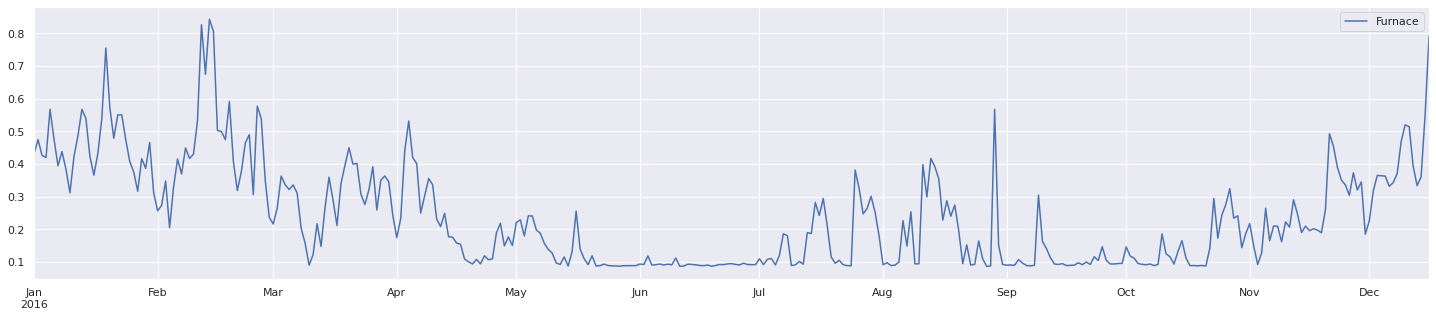

In [ ]:
df1.resample(rule='D').mean().plot(y=['Furnace'],figsize=(25,5))

after having add the sum of the furnace columns together, we now have an aggregated column that accurately shows the overall energy usage of both furances

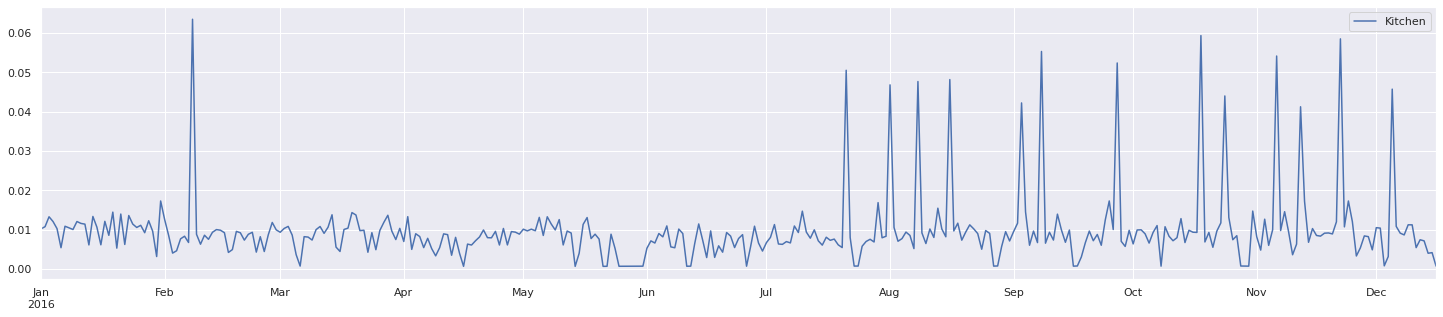

In [ ]:
df1.resample(rule='D').mean().plot(y=['Kitchen'],figsize=(25,5))

This same principal also applies for the kitchen columns. 

In [ ]:
#create separate columns from the time index
df1['year'] = df1['time'].apply(lambda x : x.year)
df1['month'] = df1['time'].apply(lambda x : x.month)
df1['day'] = df1['time'].apply(lambda x : x.day)
df1['week day'] = df1['time'].apply(lambda x : x.day_name())
df1['week of year'] = df1['time'].apply(lambda x : x.weekofyear)
df1['hour'] = df1['time'].apply(lambda x : x.hour)
df1['minute'] = df1['time'].apply(lambda x : x.minute)
df1.head()

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week day,week of year,hour,minute
2016-01-01 05:00:00,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.082617,0.000567,2016,1,1,Friday,53,5,0
2016-01-01 05:01:00,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.084533,0.000567,2016,1,1,Friday,53,5,1
2016-01-01 05:02:00,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.083017,0.000617,2016,1,1,Friday,53,5,2
2016-01-01 05:03:00,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.175417,0.000650,2016,1,1,Friday,53,5,3
2016-01-01 05:04:00,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.300917,0.000783,2016,1,1,Friday,53,5,4


In [ ]:
#definitions to further clarify time of day or night
def hours2timeofday(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [ ]:
df1['time of day'] = df1['hour'].apply(hours2timeofday)
df1.head()

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week day,week of year,hour,minute,time of day
2016-01-01 05:00:00,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.082617,0.000567,2016,1,1,Friday,53,5,0,Morning
2016-01-01 05:01:00,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.084533,0.000567,2016,1,1,Friday,53,5,1,Morning
2016-01-01 05:02:00,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.083017,0.000617,2016,1,1,Friday,53,5,2,Morning
2016-01-01 05:03:00,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.175417,0.000650,2016,1,1,Friday,53,5,3,Morning
2016-01-01 05:04:00,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.300917,0.000783,2016,1,1,Friday,53,5,4,Morning


In [ ]:
df1.dtypes

time                   datetime64[ns]
use                           float64
gen                           float64
House overall                 float64
Dishwasher                    float64
Home office                   float64
Fridge                        float64
Wine cellar                   float64
Garage door                   float64
Barn                          float64
Well                          float64
Microwave                     float64
Living room                   float64
Solar                         float64
temperature                   float64
humidity                      float64
visibility                    float64
apparentTemperature           float64
pressure                      float64
windSpeed                     float64
cloudCover                    float64
windBearing                   float64
precipIntensity               float64
dewPoint                      float64
precipProbability             float64
Furnace                       float64
Kitchen     

In [ ]:
df1.describe()

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week day,week of year,hour,minute,time of day
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.0,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.081287,0.063556,0.042137,0.014139,0.058530,0.015642,0.010983,0.035313,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,0.225873,202.356843,0.002598,38.694013,0.056453,0.235989,0.009788,2016.0,6.268381,15.411681,3.000536,25.519557,11.501399,29.499107,1.624873
std,1.058207,0.128428,1.058207,0.190951,0.104466,0.076199,0.057967,0.014292,0.202706,0.137841,0.098859,0.096056,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,0.289892,106.520474,0.011257,19.087939,0.165836,0.273885,0.079883,0.0,3.319007,8.788936,1.999779,14.471507,6.922017,17.318119,1.072903
min,0.000000,0.000000,0.000000,0.000000,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,0.000000,-27.240000,0.000000,0.000300,0.000000,2016.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.040383,0.005083,0.007133,0.012733,0.029833,0.000983,0.003617,0.001483,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,0.040000,148.000000,0.000000,24.600000,0.000000,0.085300,0.000600,2016.0,3.000000,8.000000,1.000000,13.000000,6.000000,14.000000,1.000000
50%,0.562333,0.004283,0.562333,0.000017,0.042217,0.005433,0.008083,0.012933,0.031317,0.001000,0.004000,0.001617,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,0.120000,208.000000,0.000000,39.030000,0.000000,0.088950,0.000750,2016.0,6.000000,15.000000,3.000000,25.000000,12.000000,29.000000,2.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068283,0.125417,0.053192,0.013100,0.032883,0.001017,0.004067,0.001750,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,0.290000,295.000000,0.000000,54.790000,0.000000,0.219417,0.000850,2016.0,9.000000,23.000000,5.000000,38.000000,18.000000,44.000000,2.000000
max,14.714567,0.613883,14.714567,1.401767,0.971750,0.851267,1.273933,1.088983,7.027900,1.633017,1.929800,0.465217,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,1.000000,359.000000,0.191000,75.490000,0.840000,2.472633,2.265867,2016.0,12.000000,31.000000,6.000000,53.000000,23.000000,59.000000,3.000000


## 4) Data visualisation

1) Data values over time

Temperature (daily average)

Note - temperature range in Celsius from -25 to 33

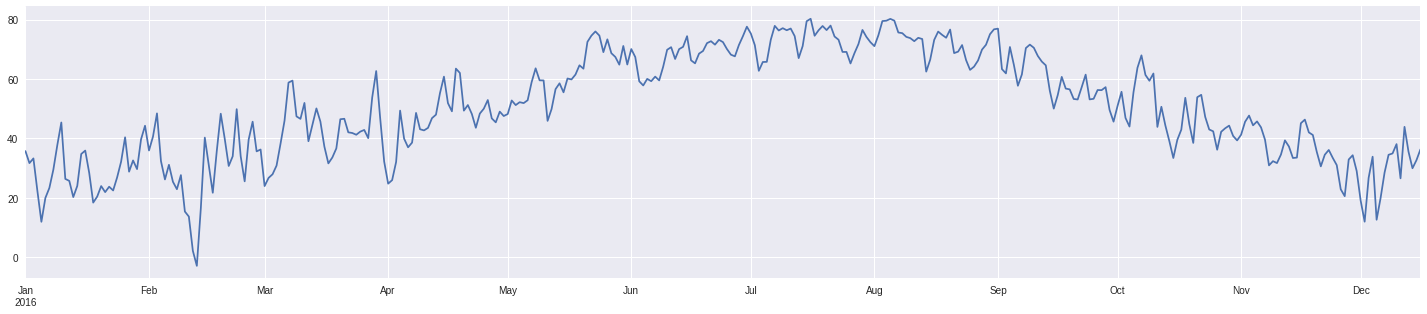

In [ ]:
df1["temperature"].resample(rule='D').mean().plot(figsize=(25,5))

House overall energy consumption - daily average (kW)

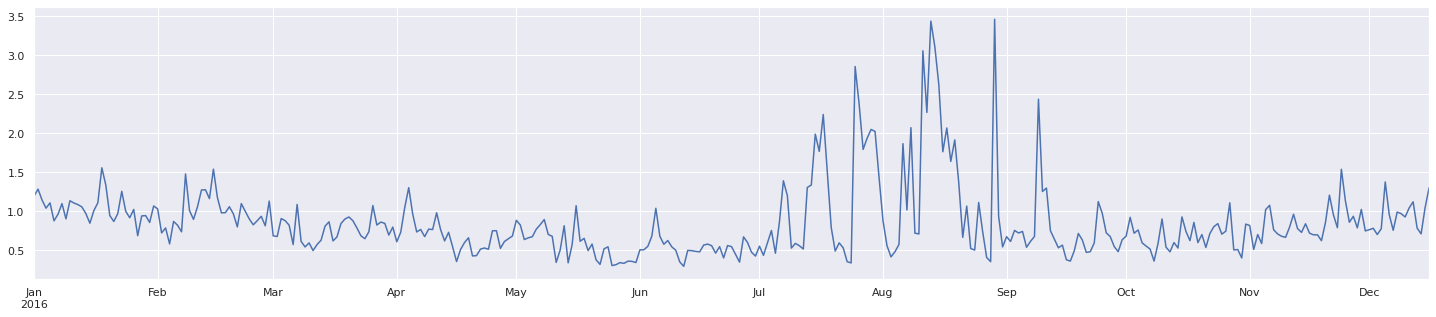

In [ ]:
df1["House overall"].resample(rule='D').mean().plot(figsize=(25,5))

Solar overall energy generation - daily average (kW)

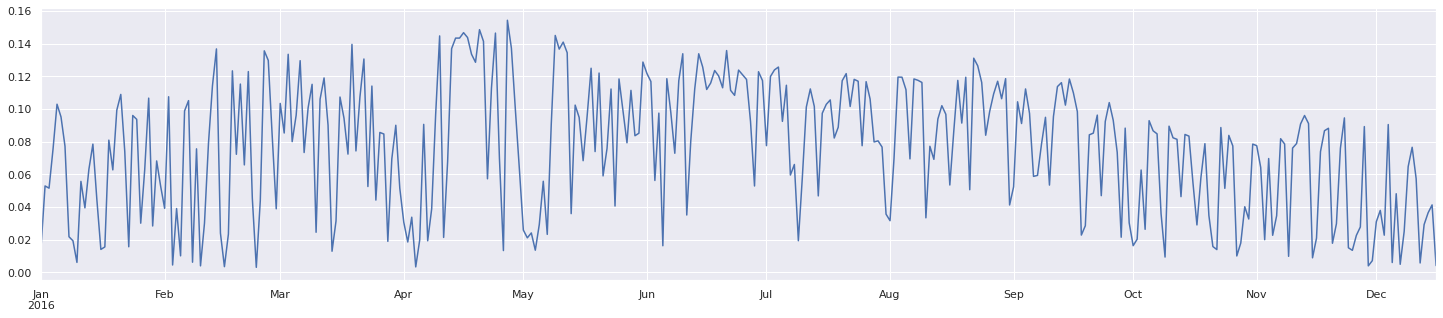

In [ ]:
df1["Solar"].resample(rule='D').mean().plot(figsize=(25,5))

Solar overall energy generation vs Cloud cover - daily average (Energy in kW, Cloud cover in Okta)

We can observe that in some days when the Cloud cover peaks, then Solar drops

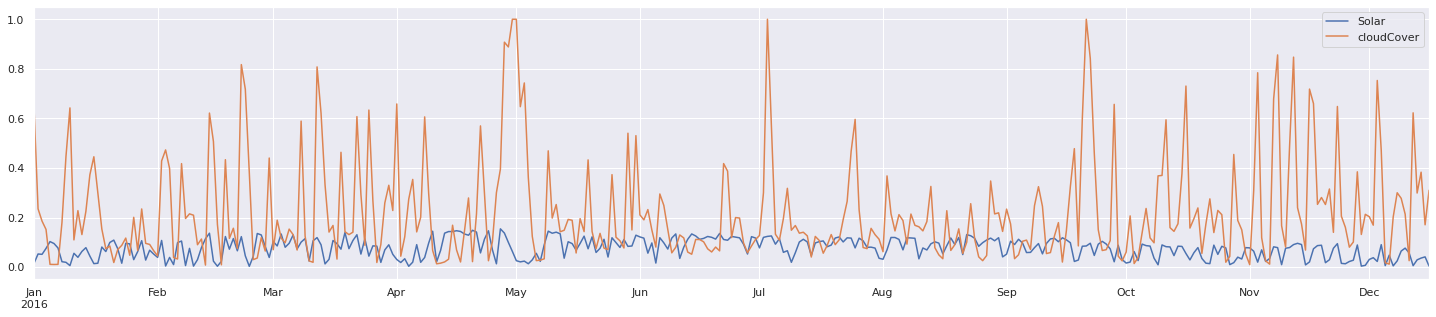

In [ ]:
df1.resample(rule='D').mean().plot(y=["Solar", "cloudCover"],figsize=(25,5))

Why energy use in House overall spikes in July-Sep?

Notes:
Furnaces energy use pattern over time (higher in winter and lower in th esummer) offset by  Fridge and Wine cellar (lowe rin winter and higher in the summer)

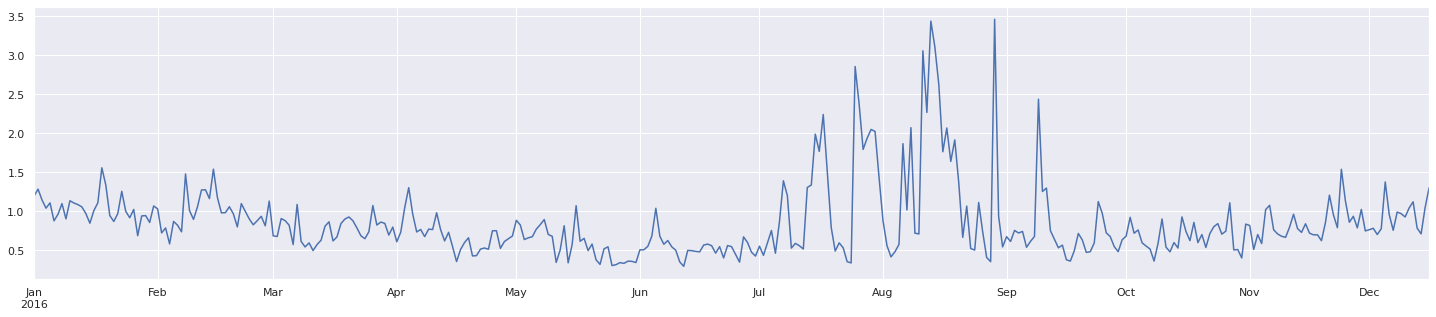

In [ ]:
df1["House overall"].resample(rule='D').mean().plot(figsize=(25,5))

Checking the kitchen - Fridge energy use increase in the summer

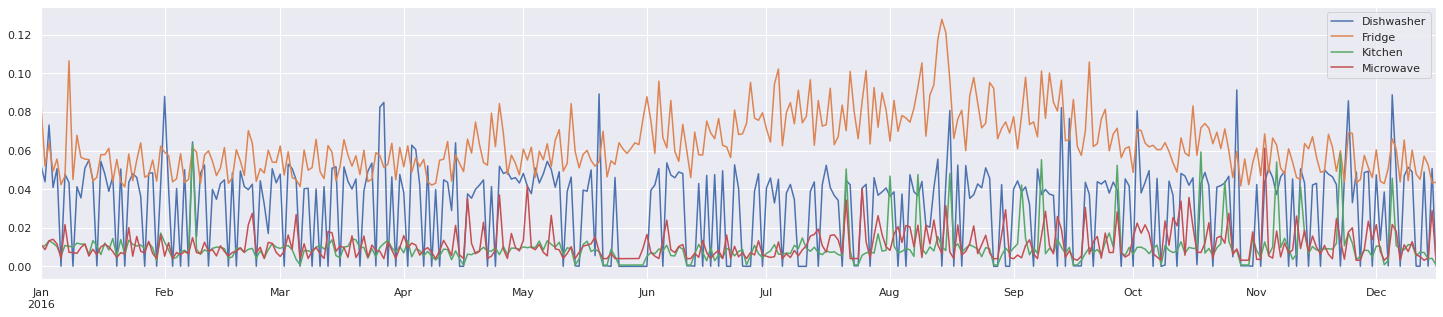

In [ ]:
df1.resample(rule='D').mean().plot(y=["Dishwasher", "Fridge","Kitchen","Microwave"],figsize=(25,5))

Checking Furnaces

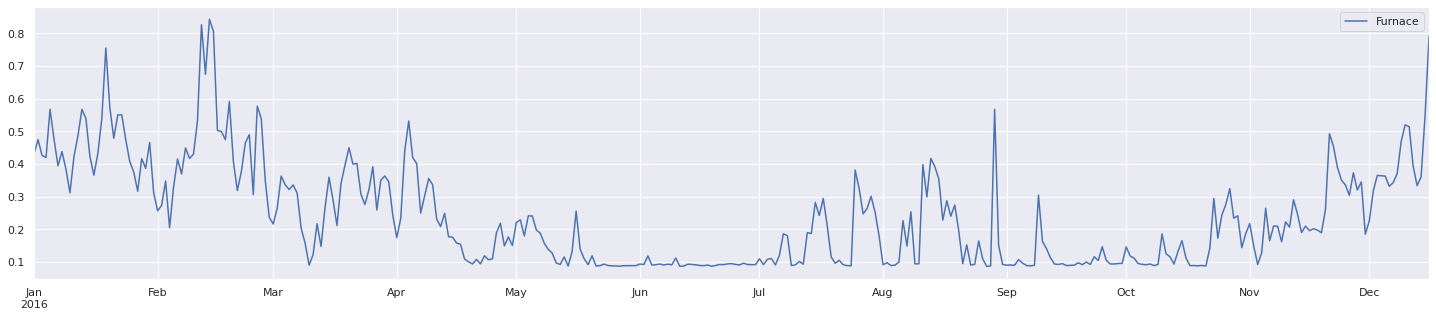

In [ ]:
df1.resample(rule='D').mean().plot(y=["Furnace"],figsize=(25,5))

Checking other house area - Wine cellar energy use increase in the summer; Home office spike in August

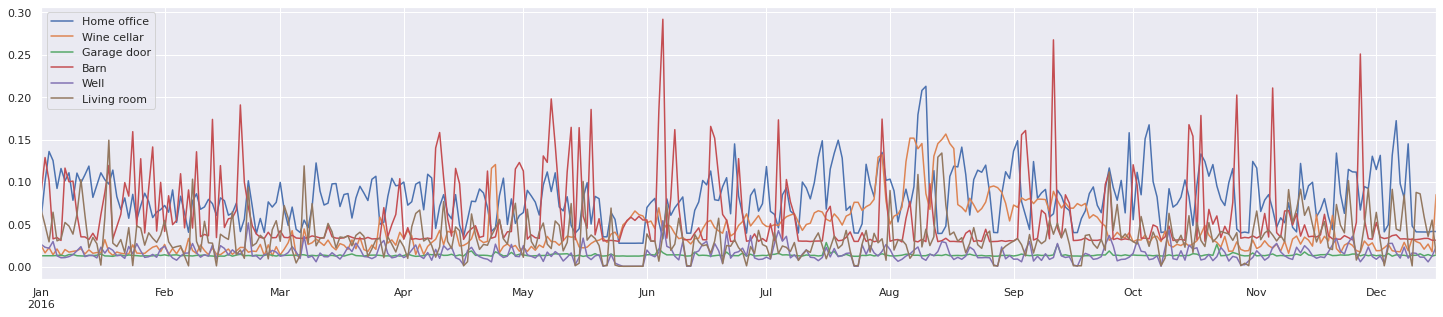

In [ ]:
df1.resample(rule='D').mean().plot(y=["Home office","Wine cellar","Garage door","Barn","Well","Living room"],figsize=(25,5))

1) Data visualisation with Heat map

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week of year,hour,minute
use,1.000000,-0.131635,1.000000,0.196272,0.147520,0.149223,0.124506,0.026531,0.196339,0.157281,0.114817,0.200350,-0.131635,0.010379,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033513,0.011183,0.024836,0.016040,-0.003317,0.513503,0.103777,NaN,-0.003207,0.007126,0.007698,0.005240,-0.000313
gen,-0.131635,1.000000,-0.131635,0.038204,-0.085421,-0.002862,0.062430,0.036328,0.036456,0.025112,0.000375,-0.047849,1.000000,0.090983,0.007608,-0.017650,0.093793,-0.000222,-0.056554,0.000806,-0.007882,0.030447,0.089664,0.041192,-0.082863,-0.017690,NaN,-0.038014,0.038253,-0.042881,0.410571,0.000239
House overall,1.000000,-0.131635,1.000000,0.196272,0.147520,0.149223,0.124506,0.026531,0.196339,0.157281,0.114817,0.200350,-0.131635,0.010379,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033513,0.011183,0.024836,0.016040,-0.003317,0.513503,0.103777,NaN,-0.003207,0.007126,0.007698,0.005240,-0.000313
Dishwasher,0.196272,0.038204,0.196272,1.000000,0.065525,0.034020,-0.004619,-0.008958,0.006914,0.008316,-0.001197,0.000612,0.038204,-0.015716,-0.001868,-0.008064,-0.014547,0.000211,-0.001672,-0.002354,0.004016,0.006265,-0.016099,0.008189,-0.004197,0.003272,NaN,-0.003923,-0.013282,-0.000919,-0.015590,0.001156
Home office,0.147520,-0.085421,0.147520,0.065525,1.000000,0.035013,0.003896,-0.013537,-0.038479,-0.006467,-0.007923,-0.052402,-0.085421,0.011908,-0.006008,0.020638,0.010856,0.027091,-0.017898,-0.040305,0.012427,-0.029890,0.007594,-0.032861,-0.017735,0.007517,NaN,0.031268,-0.022400,0.036426,-0.196688,0.000381
Fridge,0.149223,-0.002862,0.149223,0.034020,0.035013,1.000000,0.076183,-0.002380,-0.002205,0.010579,0.025698,0.054008,-0.002862,0.107466,0.030749,0.009019,0.107064,-0.000517,-0.024886,-0.023414,-0.008589,0.014253,0.115169,0.004794,-0.047486,0.011322,NaN,0.048400,0.000145,0.048954,-0.023261,0.002344
Wine cellar,0.124506,0.062430,0.124506,-0.004619,0.003896,0.076183,1.000000,0.004393,0.006372,0.006686,0.013267,0.033997,0.062430,0.289168,0.055541,0.030095,0.288882,0.018494,-0.052860,-0.040557,-0.025930,0.016588,0.298207,0.006571,-0.093372,0.005218,NaN,0.134409,0.027662,0.125140,0.076454,0.000860
Garage door,0.026531,0.036328,0.026531,-0.008958,-0.013537,-0.002380,0.004393,1.000000,0.017447,0.005698,-0.002093,0.004466,0.036328,0.013511,-0.007399,0.002262,0.013578,-0.000276,0.000419,-0.007440,0.012327,-0.006941,0.008350,-0.006639,-0.012138,-0.000467,NaN,0.012905,-0.000984,0.011165,0.042341,-0.004231
Barn,0.196339,0.036456,0.196339,0.006914,-0.038479,-0.002205,0.006372,0.017447,1.000000,0.002568,0.002386,-0.007774,0.036456,-0.017188,-0.002141,0.008376,-0.015189,0.011716,-0.015196,-0.011614,0.006255,-0.007258,-0.016738,-0.006063,-0.004299,-0.007801,NaN,-0.024798,-0.012976,-0.019872,0.100305,-0.002606
Well,0.157281,0.025112,0.157281,0.008316,-0.006467,0.010579,0.006686,0.005698,0.002568,1.000000,0.005573,0.078899,0.025112,-0.004691,-0.006590,-0.001069,-0.004741,0.002994,0.000677,-0.003003,0.004085,-0.004377,-0.007346,-0.002788,0.020702,0.021382,NaN,-0.003110,-0.006926,-0.001782,0.024303,-0.004448


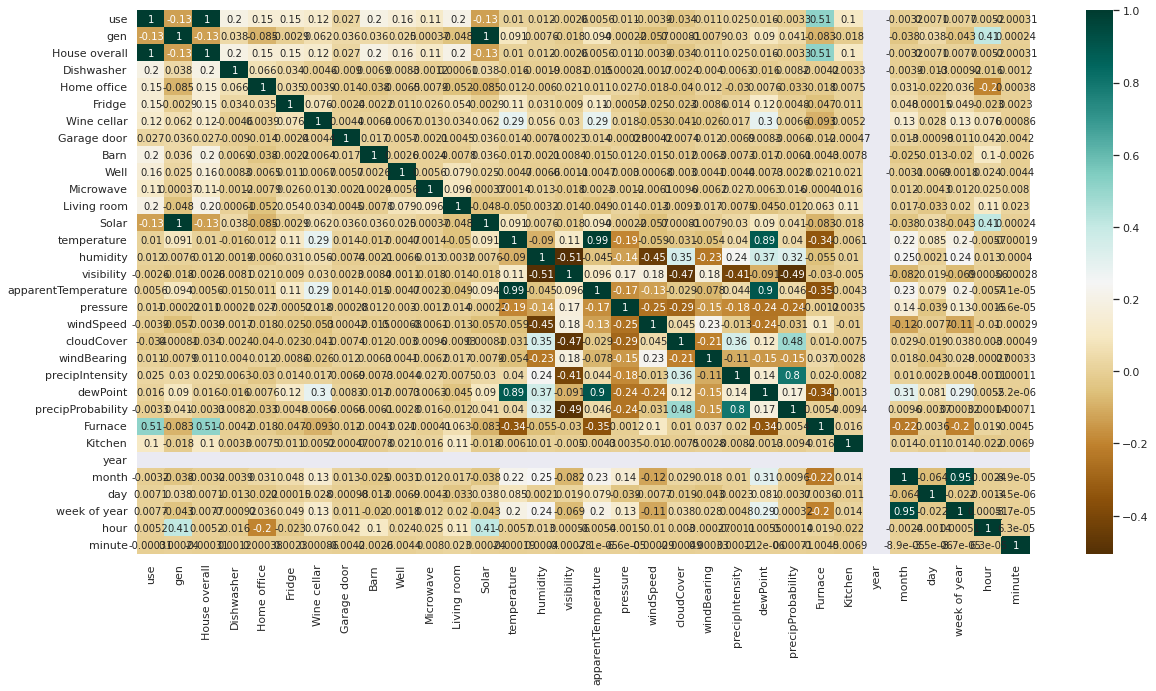

In [ ]:
plt.figure(figsize=(20,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

The heat map shows strict relationship =1 between columns "use" and "House overall". 
This means that Total energy consumption (column "use") is the same as Overall house energy consumption (column "House overall").
We can remove one of these columns as they present the same data - I will remove column "use";

The heat map also shows strict relationship =1 between columns "gen and "Solar". 
This means that Total energy generated (column "gen") comes from Solar power generation (column "Solar").
We can remove one of these columns as they present the same data - I will remove column "gen";

In the area of Weather affecting Appliances energy usage, we observe low correlation:
- House overall shows no evident correlation to any of the weather features.
- Furnace1 - small negative correlation with temperature (-0.3), apparent Temperature (-0.31) and dewPoint (-0.3)
- Furnace2 - small negative correlation with temperature (-0.24), apparent Temperature (-0.24) and dewPoint (-0.23)
- Fridge - small positive correlation with temperature (0.11), apparent Temperature (0.11) and dewPoint (0.12)
- Wine cellar - small positive correlation with temperature (0.29), apparent Temperature (0.29) and dewPoint (0.3)

In the ara of Solar energy generation, we observe:
- Solar shows small negative correlation with House overall energy use (-0.13) and Furnace2 (-0.11)
- some correlation between Solar energy generation and Weather features would be expected, however there is no correlation evident in this dataset. 

https://www.solaralliance.com/how-do-clouds-affect-solar-panels/#:~:text=Yes%2C%20solar%20panels%20can%20work,fog%20and%20shade%20from%20trees.

In [ ]:
df1.head(5)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week day,week of year,hour,minute,time of day
2016-01-01 05:00:00,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.082617,0.000567,2016,1,1,Friday,53,5,0,Morning
2016-01-01 05:01:00,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.084533,0.000567,2016,1,1,Friday,53,5,1,Morning
2016-01-01 05:02:00,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.083017,0.000617,2016,1,1,Friday,53,5,2,Morning
2016-01-01 05:03:00,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.175417,0.000650,2016,1,1,Friday,53,5,3,Morning
2016-01-01 05:04:00,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.300917,0.000783,2016,1,1,Friday,53,5,4,Morning


2) Visualisation for Weather vs Appliances energy usage

Below, we will show a relationship between Weather features and Appliances energy usage, as uncovered in Heat map above

1. House overall - very low correlation to any of the Weather features

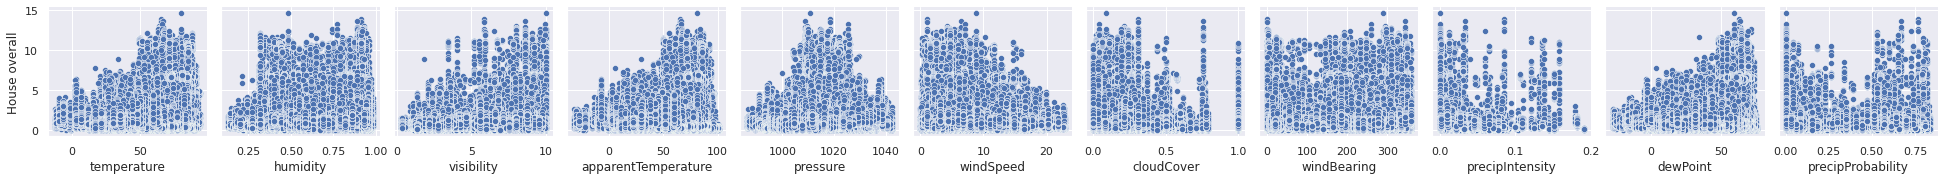

In [ ]:
sns.pairplot(df1,x_vars=["temperature","humidity","visibility","apparentTemperature","pressure","windSpeed","cloudCover","windBearing","precipIntensity","dewPoint","precipProbability"], y_vars=["House overall"])

Furnace1 - small negative correlation with temperature (-0.3)

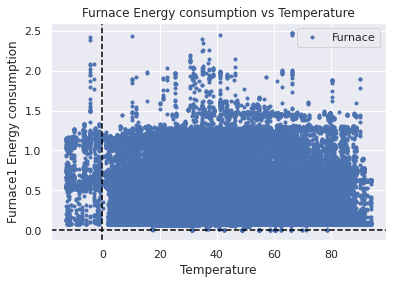

In [ ]:
df1.plot(x='temperature', y='Furnace', style='.')
plt.title('Furnace Energy consumption vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Furnace1 Energy consumption')
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')

plt.show()

Furnace2 - small negative correlation with temperature (-0.24)

In [ ]:
df1.plot(x='temperature', y='Furnace 2', style='.')
plt.title('Furnace2 Energy consumption vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Furnace2 Energy consumption')
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')

plt.show()

KeyError: ignored

Fridge - small positive correlation with temperature (0.11)

In [ ]:
df1.plot(x='temperature', y='Fridge', style='.')
plt.title('Fridge Energy consumption vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Fridge Energy consumption')
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')

plt.show()

Wine cellar - small positive correlation with temperature (0.29)

In [ ]:
df1.plot(x='temperature', y='Wine cellar', style='.')
plt.title('Wine cellar Energy consumption vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Wine cellar Energy consumption')
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')

plt.show()

Solar shows small negative correlation with House overall energy use (-0.13)

In [ ]:
df1.plot(x='House overall', y='Solar', style='.')
plt.title('Solar Energy generation vs House overall Energy consumption')
plt.xlabel('House overall')
plt.ylabel('Solar Energy generation')
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')

plt.show()

Solar shows small negative correlation with  Furnace2 (-0.11)

In [ ]:
df1.plot(x='Furnace', y='Solar', style='.')
plt.title('Solar Energy generation vs Furnace 2')
plt.xlabel('Furnace 2')
plt.ylabel('Solar Energy generation')
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')

plt.show()

3) Outliers - by comparing max and mean values, there are posisble outliers in all columns related to Energy usage and generation.

In [ ]:
df1.shape

(503910, 35)

In [ ]:
df1.describe()

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week of year,hour,minute
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.0,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.081287,0.063556,0.042137,0.014139,0.058530,0.015642,0.010983,0.035313,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,0.225873,202.356843,0.002598,38.694013,0.056453,0.235989,0.009788,2016.0,6.268381,15.411681,25.519557,11.501399,29.499107
std,1.058207,0.128428,1.058207,0.190951,0.104466,0.076199,0.057967,0.014292,0.202706,0.137841,0.098859,0.096056,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,0.289892,106.520474,0.011257,19.087939,0.165836,0.273885,0.079883,0.0,3.319007,8.788936,14.471507,6.922017,17.318119
min,0.000000,0.000000,0.000000,0.000000,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,0.000000,-27.240000,0.000000,0.000300,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.040383,0.005083,0.007133,0.012733,0.029833,0.000983,0.003617,0.001483,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,0.040000,148.000000,0.000000,24.600000,0.000000,0.085300,0.000600,2016.0,3.000000,8.000000,13.000000,6.000000,14.000000
50%,0.562333,0.004283,0.562333,0.000017,0.042217,0.005433,0.008083,0.012933,0.031317,0.001000,0.004000,0.001617,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,0.120000,208.000000,0.000000,39.030000,0.000000,0.088950,0.000750,2016.0,6.000000,15.000000,25.000000,12.000000,29.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068283,0.125417,0.053192,0.013100,0.032883,0.001017,0.004067,0.001750,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,0.290000,295.000000,0.000000,54.790000,0.000000,0.219417,0.000850,2016.0,9.000000,23.000000,38.000000,18.000000,44.000000
max,14.714567,0.613883,14.714567,1.401767,0.971750,0.851267,1.273933,1.088983,7.027900,1.633017,1.929800,0.465217,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,1.000000,359.000000,0.191000,75.490000,0.840000,2.472633,2.265867,2016.0,12.000000,31.000000,53.000000,23.000000,59.000000


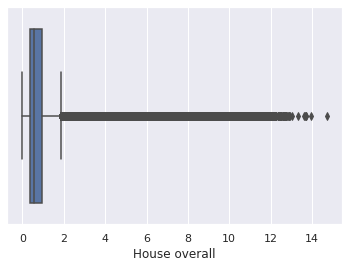

In [ ]:
sns.boxplot(x=df1["House overall"])

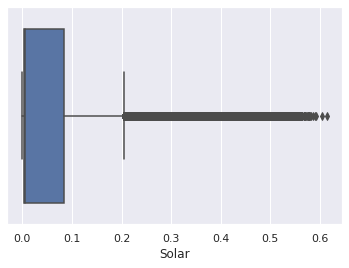

In [ ]:
sns.boxplot(x=df1["Solar"])

# Machine Learning - Light GBM Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

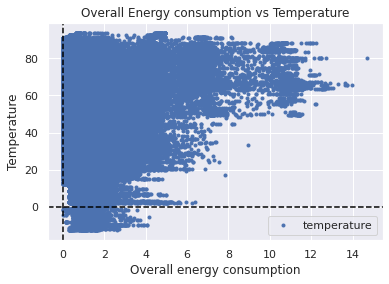

In [ ]:
df1.plot(x='House overall', y='temperature', style='.')
plt.title('Overall Energy consumption vs Temperature')
plt.xlabel('Overall energy consumption')
plt.ylabel('Temperature')

# adding vertical line 
plt.axvline(0, c='black', ls='--')
  
# adding horizontal line
plt.axhline(0, c='black', ls='--')

plt.show()

The main problem with the above graph is that it does not show negative temperatures. Let's create a more detailed graph. 

**The negative temperature shows on the graph above if you add axis; also probably need to swap y and x (Temperature doesn't depend on Energy usage)

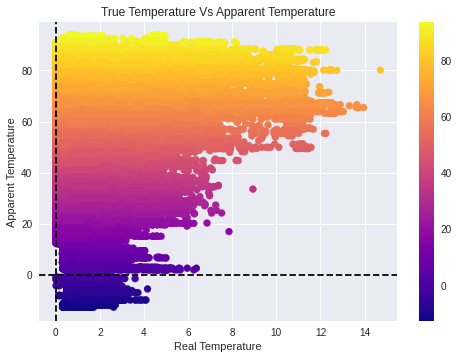

In [ ]:
# creating two array for plotting
a = df1["House overall"]
b = df1["temperature"]
  
# adding style theme in scatter plot
plt.style.use('seaborn')
  
# creating scatter plot with both negative 
# and positive axes
plt.scatter(a, b, c=b, cmap='plasma')
  
# adding vertical line 
plt.axvline(0, c='black', ls='--')
  
# adding horizontal line
plt.axhline(0, c='black', ls='--')
  
# giving x label to the plot
plt.xlabel("Real Temperature")
  
# giving y label to the plot
plt.ylabel("Apparent Temperature")
  
# giving title to the plot
plt.title("True Temperature Vs Apparent Temperature")
  
#visualising the mapping in colors
plt.colorbar()
  
# visualizing the plot using plt.show() function
plt.show()

As we can see from the above graph. The true temperature holds mostly consistent until it becomes very cold or very hot. 

However, because we need all values to be in the same plane (i.e no negative values) we will have to normalize our dataset. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
df1['week day'] =   LabelEncoder().fit_transform(pd.Series(df1.index).apply(lambda x : x.day_name())).astype(float)
df1['time of day'] = LabelEncoder().fit_transform(df1['hour'].apply(hours2timeofday)).astype(float)

In [ ]:
df1["year"] = df1["year"].astype(float)
df1["month"] = df1["month"].astype(float)
df1["day"] = df1["day"].astype(float)
df1["week day"] = df1["week day"].astype(float)
df1["week of year"] = df1["week of year"].astype(float)
df1["hour"] = df1["hour"].astype(float)
df1["minute"] = df1["minute"].astype(float)
df1["time of day"] = df1["time of day"].astype(float)

df1 = df1.drop("time", axis=1)

In [ ]:
df1.head()

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week day,week of year,hour,minute,time of day
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.082617,0.000567,2016.0,1.0,1.0,0.0,53.0,5.0,0.0,2.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.084533,0.000567,2016.0,1.0,1.0,0.0,53.0,5.0,1.0,2.0
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.083017,0.000617,2016.0,1.0,1.0,0.0,53.0,5.0,2.0,2.0
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.175417,0.000650,2016.0,1.0,1.0,0.0,53.0,5.0,3.0,2.0
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.12,282.0,0.0,24.4,0.0,0.300917,0.000783,2016.0,1.0,1.0,0.0,53.0,5.0,4.0,2.0


In [ ]:
X = df1.loc[:, df1.columns != 'House overall']
y = df1.iloc[:, 3]

                             # Dependent variable

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)


# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((503910, 33), (503910,), (377932, 33), (125978, 33), (377932,), (125978,))

In [ ]:
X_train.head()

,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,year,month,day,week day,week of year,hour,minute,time of day
2016-05-19 01:08:00,0.957633,0.003550,0.000017,0.505167,0.004817,0.006900,0.012933,0.031333,0.001000,0.004050,0.001767,0.003550,79.12,0.28,9.83,79.12,1010.63,7.55,0.22,30.0,0.0,42.86,0.0,0.083933,0.001017,2016.0,5.0,19.0,4.0,20.0,1.0,8.0,3.0
2016-11-26 02:31:00,2.028167,0.004833,0.000000,0.525317,0.137033,0.008150,0.012600,0.032533,0.000733,0.002917,0.009683,0.004833,25.30,0.49,10.00,14.65,1022.66,11.41,0.15,310.0,0.0,8.73,0.0,0.084467,0.000883,2016.0,11.0,26.0,2.0,47.0,2.0,31.0,3.0
2016-10-08 12:58:00,0.390867,0.061250,0.000017,0.039567,0.129283,0.008083,0.013100,0.029883,0.000983,0.003150,0.001600,0.061250,63.48,0.59,10.00,63.48,1018.36,5.26,0.07,324.0,0.0,49.08,0.0,0.100550,0.000600,2016.0,10.0,8.0,2.0,40.0,12.0,58.0,0.0
2016-01-02 12:28:00,1.453317,0.002400,0.000167,0.048600,0.005300,0.122950,0.012567,0.032367,0.001000,0.004150,0.001467,0.002400,28.65,0.62,10.00,20.86,1015.67,7.86,0.17,253.0,0.0,17.27,0.0,1.029750,0.000800,2016.0,1.0,2.0,2.0,53.0,12.0,28.0,0.0
2016-04-29 18:31:00,0.087433,0.237367,0.000000,0.038917,0.005100,0.006917,0.012950,0.031017,0.001000,0.004100,0.001550,0.237367,51.85,0.79,9.45,51.85,1010.27,5.31,1.00,21.0,0.0,45.61,0.0,0.086467,0.000767,2016.0,4.0,29.0,0.0,17.0,18.0,31.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.fit_transform(X_test)

X_train_final = pd.DataFrame(X_train_scaled)
X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.093034,-0.565763,-0.163855,4.063333,-0.770426,-0.606926,-0.084019,-0.134773,-0.106748,-0.070310,-0.348990,-0.565763,1.484405,-1.976955,0.357778,1.400858,-0.718873,0.227884,-0.019894,-1.617261,-0.230699,0.217927,-0.3399,-0.555338,-0.109726,0.0,-0.382627,0.409543,0.500538,-0.382136,-1.514246,-1.242020,1.280899
1,1.105048,-0.555771,-0.163942,4.256464,0.961226,-0.585356,-0.106812,-0.128795,-0.108673,-0.081761,-0.266521,-0.555771,-1.330014,-0.896733,0.463225,-1.525322,0.804049,1.197933,-0.261449,1.011172,-0.230699,-1.568676,-0.3399,-0.553390,-0.111375,0.0,1.424961,1.206149,-0.499480,1.483349,-1.369847,0.085924,1.280899
2,-0.442751,-0.116543,-0.163855,-0.399282,0.859724,-0.586506,-0.072622,-0.141996,-0.106868,-0.079403,-0.350727,-0.116543,0.666540,-0.382341,0.463225,0.690986,0.259696,-0.347612,-0.537512,1.142594,-0.230699,0.543525,-0.3399,-0.494638,-0.114882,0.0,1.123696,-0.842267,-0.499480,0.999705,0.074141,1.644814,-1.516850
3,0.561622,-0.574716,-0.163068,-0.312701,-0.764096,1.395682,-0.109091,-0.129626,-0.106748,-0.069300,-0.352116,-0.574716,-1.154831,-0.228024,0.463225,-1.243461,-0.080841,0.305789,-0.192433,0.476098,-0.230699,-1.121632,-0.3399,2.899700,-0.112408,0.0,-1.587686,-1.525072,-0.499480,1.897901,0.074141,-0.087286,-1.516850
4,-0.729598,1.254601,-0.163942,-0.405512,-0.766715,-0.606639,-0.082879,-0.136351,-0.106748,-0.069805,-0.351248,1.254601,0.058370,0.646442,0.122073,0.163121,-0.764446,-0.335047,2.671715,-1.701746,-0.230699,0.361881,-0.3399,-0.546084,-0.112819,0.0,-0.683892,1.547552,-1.499498,-0.589412,0.940534,0.085924,-0.584267


In [ ]:
# Train the model
lr = LinearRegression().fit(X_train_final, y_train)

In [ ]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

0.031246627456209063
[ 4.50739159e-17 -3.41444198e-04  1.90595407e-01 -2.34197479e-17
  3.98817013e-18 -7.45187426e-17 -2.65363224e-18  2.86083463e-17
 -6.96040811e-17  6.71720196e-17  6.62408323e-17  3.41444198e-04
  2.41568482e-16  5.06930534e-17  5.30848994e-17 -1.90453080e-16
 -2.49608084e-17 -6.56819372e-17  3.69105455e-17 -2.73133127e-17
 -4.20343478e-17 -4.02212243e-17 -3.74601165e-17 -5.62724608e-17
 -3.46917598e-17  3.12607738e-10 -1.97054386e-17 -3.87160391e-17
  6.74631915e-17 -3.01096443e-17  4.73102947e-17  2.45815003e-17
  3.87559336e-17]


In [ ]:
# Calculate the predicted values
y_pred = lr.predict(X_test_scaled)
y_pred

array([ 1.54629908e-05, -2.49234454e-04, -2.49234454e-04, ...,
        3.20058987e-05, -2.49234454e-04,  1.18070376e-01])

Text(0, 0.5, 'Predicted Y')

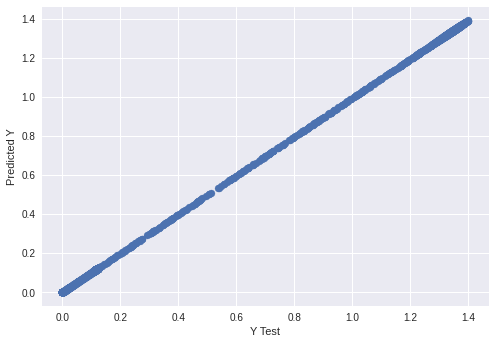

In [ ]:
 #import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print("Accuracy on test set : {: .2f}".format(lr.score(X_test_scaled, y_test)))
print("Accuracy on training set : {: .2f}".format(lr.score(X_train_final, y_train)))

Accuracy on test set :  1.00
Accuracy on training set :  1.00


In [ ]:
#k fold cross validation
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = lr , X = X_train_final, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
 Mean Accuracy : 1.0 
Standard Deviation : 0.0


In [ ]:
df1[""].resample(rule='D').mean().plot(figsize=(25,5))

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
_lgbm_df = df1.resample('H').mean()
_lgbm_df['week day'] =   LabelEncoder().fit_transform(pd.Series(_lgbm_df.index).apply(lambda x : x.day_name())).astype(np.int8)
_lgbm_df['time of day'] = LabelEncoder().fit_transform(_lgbm_df['hour'].apply(hours2timeofday)).astype(np.int8)

In [ ]:
def lgbm_train(cols=['temperature','dewPoint','House overall'],trg='House overall',train_ratio=0.8,valid_ratio=0.1,test_ratio=0.1):
    #make dataframe for training
    lgbm_df = _lgbm_df[cols]
    tr,vd,te = [int(len(lgbm_df) * i) for i in [train_ratio, valid_ratio, test_ratio]]
    X_train, Y_train = lgbm_df[0:tr].drop([trg], axis=1), lgbm_df[0:tr][trg]
    X_valid, Y_valid = lgbm_df[tr:tr+vd].drop([trg], axis=1), lgbm_df[tr:tr+vd][trg]
    X_test = lgbm_df[tr+vd:tr+vd+te+2].drop([trg], axis=1)
    lgb_train = lgb.Dataset(X_train, Y_train)
    lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)
    #model training
    params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'mse'},
        'num_leaves':200,
        'drop_rate':0.05,
        'learning_rate':0.1,
        'seed':0,
        'feature_fraction':1.0,
        'bagging_fraction':1.0,
        'bagging_freq':0,
        'min_child_samples':5
    }
    gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_train, lgb_valid], early_stopping_rounds=100)
    #make predict dataframe
    pre_df = pd.DataFrame()
    pre_df[trg] = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    pre_df.index = lgbm_df.index[tr+vd:tr+vd+te+2]
    return pre_df, gbm, X_train

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()
lgbmForecast_df, model, x_train = lgbm_train(\
                cols=['temperature', 'humidity', 'visibility', 'apparentTemperature',\
                       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',\
                       'dewPoint', 'precipProbability','year', 'month','day', 'week day', 'week of year', \
                        'hour', 'time of day','House overall'],\
                trg='House overall',train_ratio=0.9,valid_ratio=0.09,test_ratio=0.01)
#calculate SHAP value for model interpretation
explainer = shap.TreeExplainer(model=model,feature_perturbation='tree_path_dependent')
shap_values = explainer.shap_values(X=x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
lgbm_use_mae = mean_absolute_error(_lgbm_df['House overall'][-len(lgbmForecast_df):], lgbmForecast_df['House overall'])
((hv.Curve(_lgbm_df['House overall'], label='Overall Energy Usage').opts(color='blue')\
  * hv.Curve(lgbmForecast_df['House overall'], label='Predicted Energy Use').opts(color='red', title='Total Energy Consumption for 2016')).opts(legend_position='bottom') + \
 (hv.Curve(_lgbm_df['House overall'][-int(len(_lgbm_df)*0.05):], label='House overall').opts(color='blue') \
  * hv.Curve(lgbmForecast_df['House overall'], label='Predicted Energy Use').opts(color='red', title='December - Total Energy Consumption')).opts(legend_position='bottom'))\
    .opts(opts.Curve(xlabel="Time", yformatter='%.2fkw', width=800, height=300, show_grid=True, tools=['hover'])).opts(shared_axes=False).cols(1)